In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords, wordnet
from wordcloud import WordCloud, STOPWORDS
import textblob
from textblob import TextBlob, Word

In [5]:
#print(np.__version__)

In [6]:
#!pip install textblob

In [7]:
#nltk.download('wordnet')

In [8]:
from nltk.stem.wordnet import WordNetLemmatizer

In [9]:
data=pd.read_csv(r"C:\Users\user\OneDrive\Documents\Python\Healthcare\Final_selectedData-DrugRecommendation\Medicine_Details.csv")
data.head(3)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21


In [10]:
data.shape

(11825, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


In [12]:
data.duplicated().sum()/data.duplicated().count()

0.007103594080338266

In [13]:
#Since duplicates are just 0.7%, therefore dropping them.
data.drop_duplicates(inplace=True, ignore_index=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11741 entries, 0 to 11740
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11741 non-null  object
 1   Composition         11741 non-null  object
 2   Uses                11741 non-null  object
 3   Side_effects        11741 non-null  object
 4   Image URL           11741 non-null  object
 5   Manufacturer        11741 non-null  object
 6   Excellent Review %  11741 non-null  int64 
 7   Average Review %    11741 non-null  int64 
 8   Poor Review %       11741 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 825.7+ KB


In [15]:
data.select_dtypes('object').describe()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer
count,11741,11741,11741,11741,11741,11741
unique,11498,3358,712,1512,11740,759
top,Lulifin Cream,Luliconazole (1% w/w),Treatment of Type 2 diabetes mellitus,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Sun Pharmaceutical Industries Ltd
freq,4,98,904,389,2,819


In [16]:
#Renaming columns
data.columns=[col.replace(" ","_") for col in data.columns]

In [17]:
#Checking percentage total
data[(data['Excellent_Review_%']+data['Average_Review_%']+data['Poor_Review_%'])!=100]

,Medicine_Name,Composition,Uses,Side_effects,Image_URL,Manufacturer,Excellent_Review_%,Average_Review_%,Poor_Review_%


In [18]:
#most common uses
data.Uses.value_counts().nlargest(3)

Uses
Treatment of Type 2 diabetes mellitus    904
Treatment of Bacterial infections        434
 Hypertension (high blood pressure)      403
Name: count, dtype: int64

In [19]:
#most common side-effects
data.Side_effects.value_counts().nlargest(3)

Side_effects
Application site reactions burning irritation itching and redness           389
Hypoglycemia low blood glucose level Headache Nausea Diarrhea Flatulence    173
No common side effects seen                                                 147
Name: count, dtype: int64

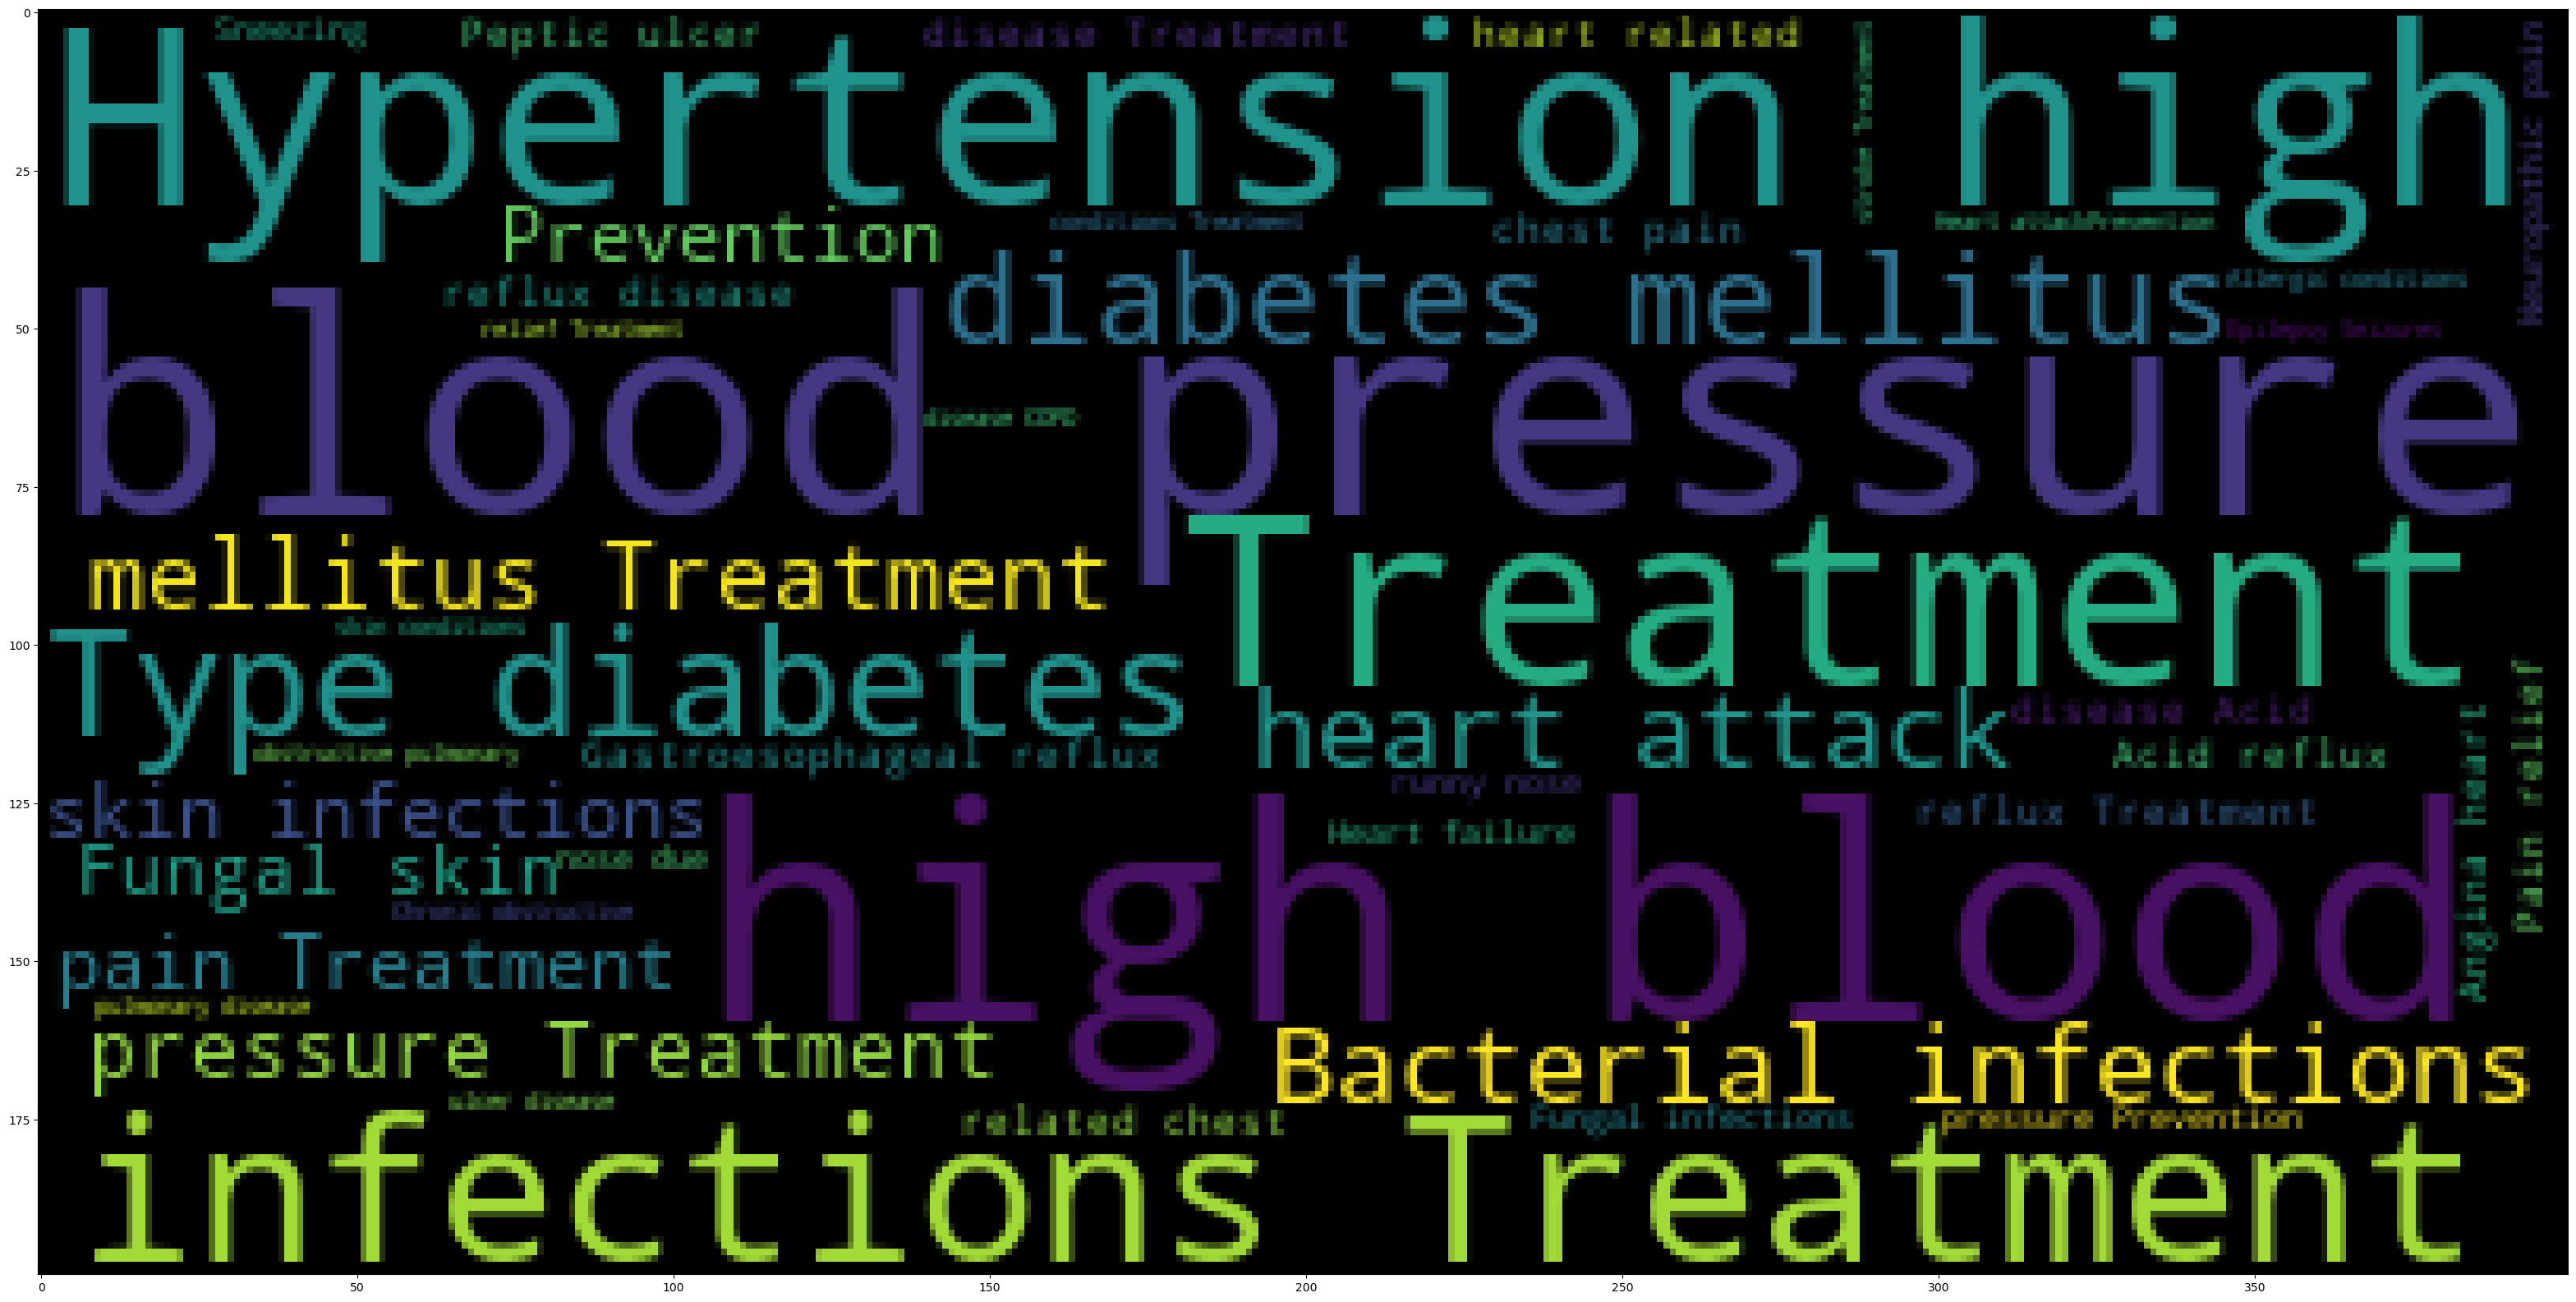

In [20]:
#Wordcloud for uses
txt=' '.join(data['Uses'].to_list())
wcl=WordCloud().generate(txt)
fig = plt.figure(figsize=(50,20))
plt.imshow(wcl)

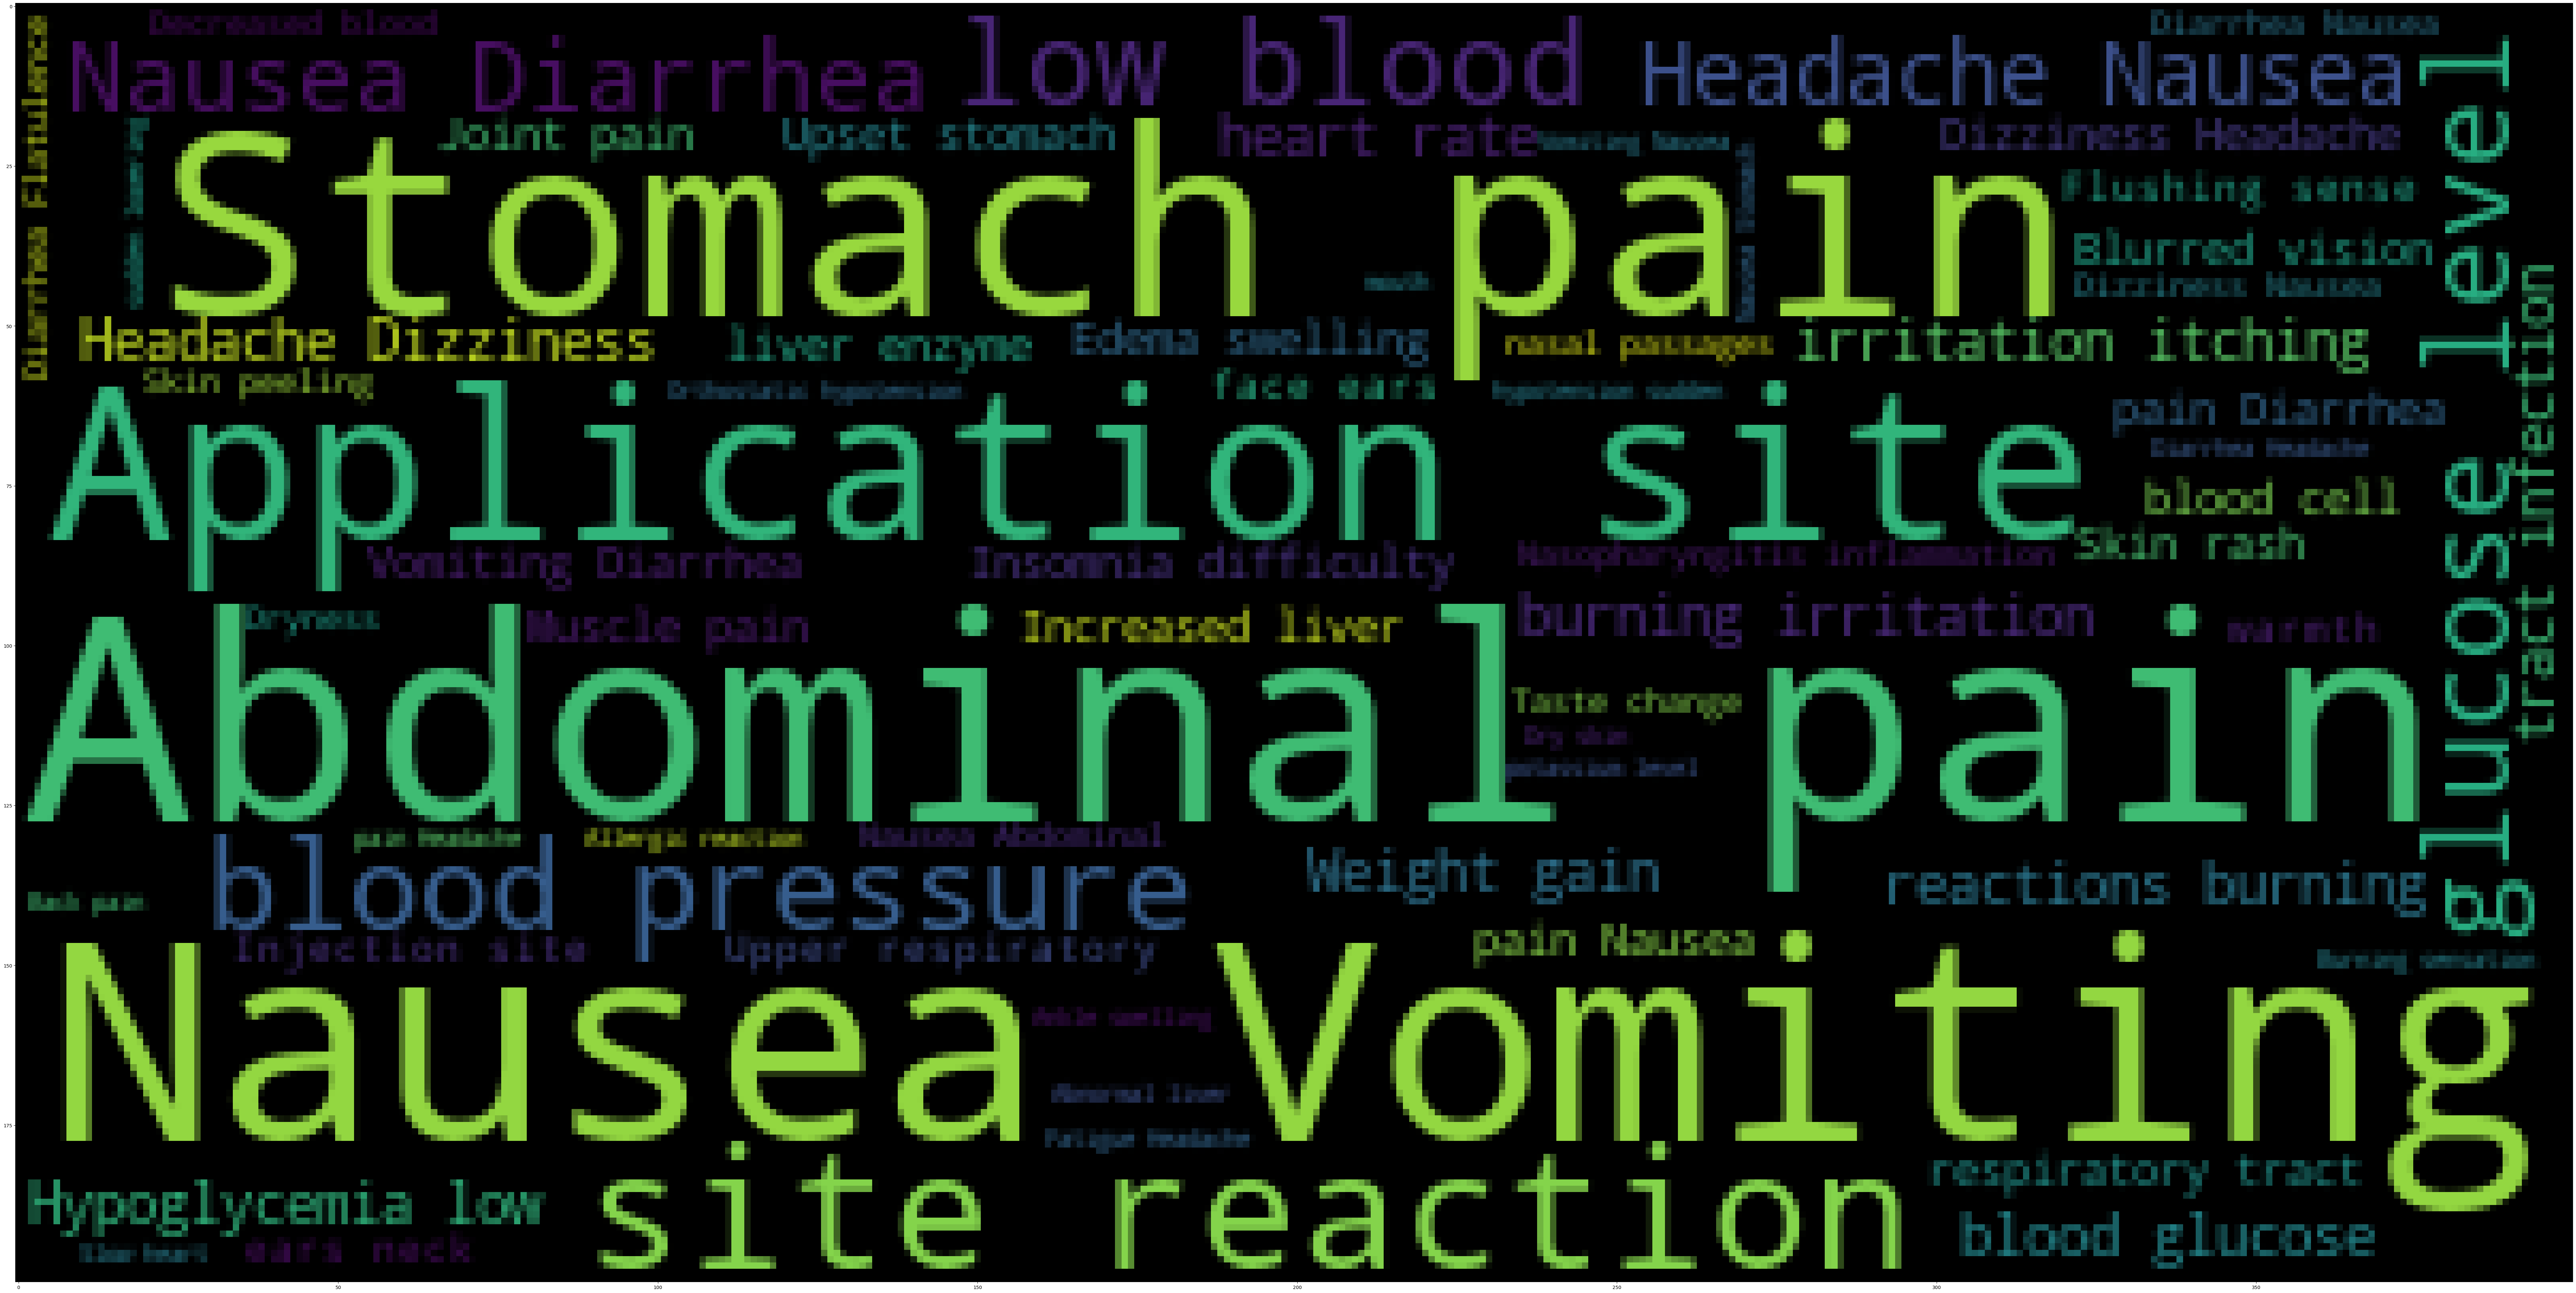

In [21]:
#Wordcloud for side effects
text=' '.join(data['Side_effects'].to_list())
wc=WordCloud().generate(text)
fig = plt.figure(figsize=(200,50))
plt.imshow(wc)

<Axes: ylabel='Manufacturer'>

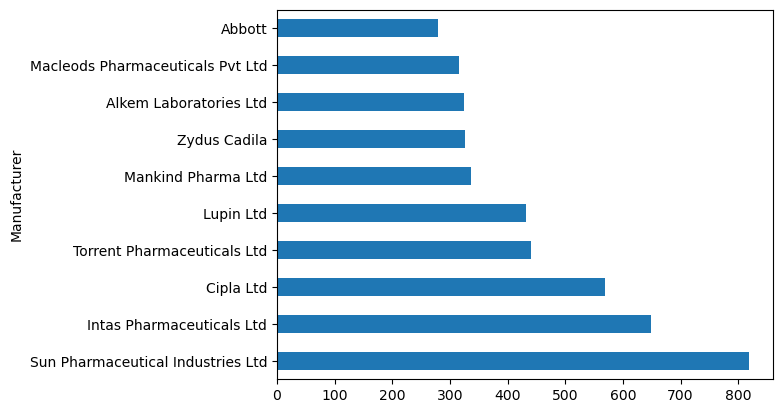

In [22]:
#Top 10 manufacturers
summ=data.groupby('Manufacturer')['Medicine_Name'].count().nlargest(10)
summ.plot(kind='barh')

array([[<Axes: title={'center': 'Excellent_Review_%'}>,
        <Axes: title={'center': 'Average_Review_%'}>],
       [<Axes: title={'center': 'Poor_Review_%'}>, <Axes: >]],
      dtype=object)

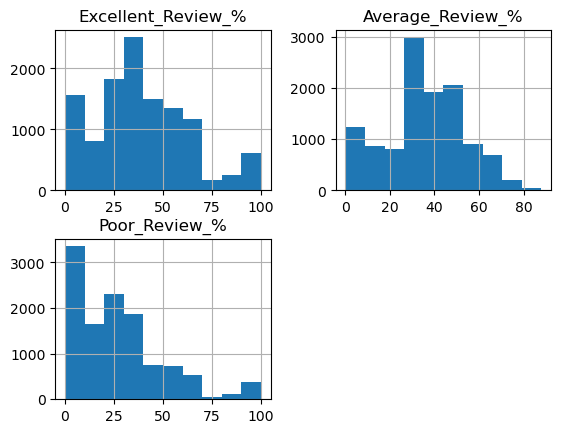

In [23]:
data.select_dtypes('int').hist()

### Text Preprocessing

In [24]:
#nltk.download('stopwords')

In [25]:
#nltk.download('punkt_tab')

In [26]:
#nltk.download('averaged_perceptron_tagger_eng')

In [27]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already u

In [28]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
stop = set(stopwords.words('english'))

In [30]:
lemmatizer = WordNetLemmatizer()

In [31]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

In [32]:
def clean(text):
    text=text.lower()                                                                   #converting to lowercase
    text = text.strip()                                                                 #removing extraspaces
    text = re.sub(r'[^a-z\s]', '', text)                                                #substituting special characters
    #text = str(TextBlob(text).correct())                                               #spellingcorrections
    blob = TextBlob(text)
    words = [word for word in blob.words if word not in stop]                                #Tokenization
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in blob.tags if word in words]            #lemmatization
    return " ".join(lemmatized)


In [33]:
data['Uses_clean']=data['Uses'].apply(clean)
data['Side_effects_clean'] = data['Side_effects'].apply(clean)

In [34]:
data.head()

,Medicine_Name,Composition,Uses,Side_effects,Image_URL,Manufacturer,Excellent_Review_%,Average_Review_%,Poor_Review_%,Uses_clean,Side_effects_clean
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,cancer colon rectum nonsmall cell lung cancer ...,rectal bleeding taste change headache noseblee...
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,treatment bacterial infection,vomit nausea diarrhea mucocutaneous candidiasis
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,treatment bacterial infection,nausea abdominal pain diarrhea
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,treatment cough mucus,nausea vomit diarrhea upset stomach stomach pa...
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,treatment gastroesophageal reflux disease acid...,headache diarrhea gastrointestinal disturbance


In [35]:
data.Uses_clean

0        cancer colon rectum nonsmall cell lung cancer ...
1                            treatment bacterial infection
2                            treatment bacterial infection
3                                    treatment cough mucus
4        treatment gastroesophageal reflux disease acid...
                               ...                        
11736           local anesthesia numb tissue specific area
11737                     hypertension high blood pressure
11738                     polycystic ovarian syndrome pcos
11739                       treatment erectile dysfunction
11740                                   treatment dandruff
Name: Uses_clean, Length: 11741, dtype: object

In [36]:
#!pip install -U spacy --user

In [37]:
#!pip install --upgrade numpy

In [38]:
#!pip install --upgrade --force-reinstall --user spacy

In [39]:
#!python -m spacy download en_core_web_sm

In [40]:
text=" ".join(data['Uses_clean'])

<Axes: xlabel='Samples', ylabel='Counts'>

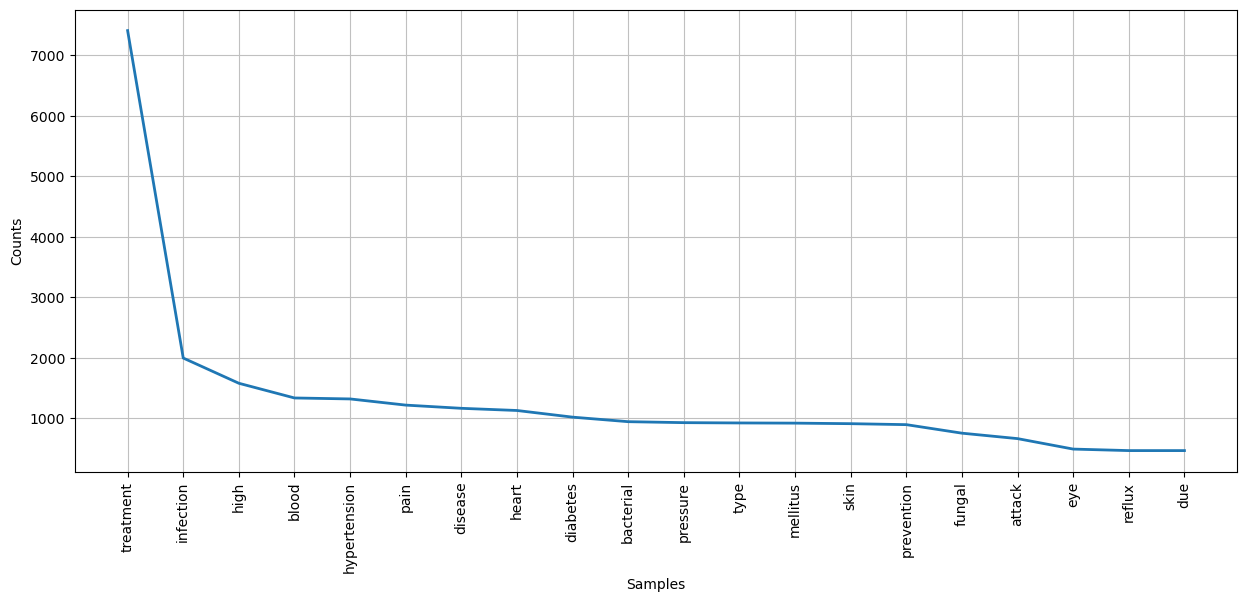

In [41]:
tokens= [token.lower() for token in text.split()]
freqdist=nltk.FreqDist(tokens)
plt.figure(figsize=(15,6))
freqdist.plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

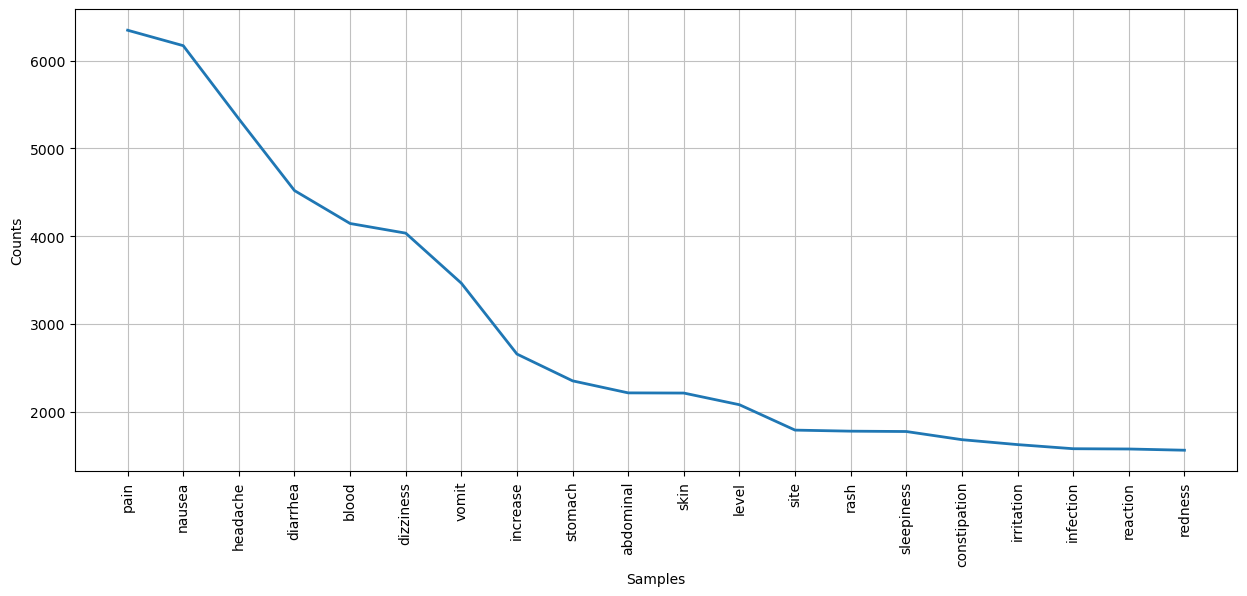

In [42]:
text2=" ".join(data['Side_effects_clean'])
tokens= [token.lower() for token in text2.split()]
freqdist=nltk.FreqDist(tokens)
plt.figure(figsize=(15,6))
freqdist.plot(20)

In [43]:
#Combining key features
data['combined'] = data['Uses_clean'] + ' ' + data['Side_effects_clean']

In [44]:
data.combined

0        cancer colon rectum nonsmall cell lung cancer ...
1        treatment bacterial infection vomit nausea dia...
2        treatment bacterial infection nausea abdominal...
3        treatment cough mucus nausea vomit diarrhea up...
4        treatment gastroesophageal reflux disease acid...
                               ...                        
11736    local anesthesia numb tissue specific area all...
11737    hypertension high blood pressure dizziness tir...
11738    polycystic ovarian syndrome pcos rash nausea p...
11739    treatment erectile dysfunction flush sense war...
11740    treatment dandruff application site reaction b...
Name: combined, Length: 11741, dtype: object

In [68]:
sample_data = data.sample(n=2000, random_state=42).reset_index(drop=True)

In [69]:
#Vectorizing the text
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sample_data['combined'])

In [70]:
#Applying cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [71]:
#Recommendation system based on Medicine search
indices = pd.Series(data.index, index=data['Medicine_Name'])  

def recommend(medicine_name, data, sim_matrix, top_n=5):
    idx = indices[medicine_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar = sim_scores[1:top_n+1]
    medicine_indices = [i[0] for i in top_similar]
    return data[['Medicine_Name', 'Uses']].iloc[medicine_indices]


In [72]:
recommend("Alex Syrup", data, cosine_sim, top_n=5)

,Medicine_Name,Uses
229,Artificial Tears BP Eye Drop,Dry eyes
428,Acetik Ear Drop,Ear infection
895,AF-K Lotion,Treatment of Fungal skin infectionsTreatment o...
1199,B Bact Ointment,Treatment of Bacterial skin infections
1560,Deritas 7.5 Tablet PR,Treatment of Overactive bladder (OAB) symptoms


In [73]:
#Recommendation system based on disease search
def search_medicines_by_condition(condition, df, top_n=5):
    condition = condition.lower()
    results = df[df['Uses_clean'].str.contains(condition, case=False, na=False)]
    return results.head(top_n)[['Medicine_Name', 'Uses']]

In [74]:
search_medicines_by_condition("infection", data, top_n=3)

,Medicine_Name,Uses
1,Augmentin 625 Duo Tablet,Treatment of Bacterial infections
2,Azithral 500 Tablet,Treatment of Bacterial infections
8,Amoxyclav 625 Tablet,Treatment of Bacterial infections


In [51]:
data.to_csv("C:\\Users\\user\\OneDrive\\Documents\\Python\\Healthcare\\Final_selectedData-DrugRecommendation\\cleaned_data.csv", index=False)

In [65]:
import joblib

In [75]:
joblib.dump(cosine_sim, 'C:\\Users\\user\\OneDrive\\Documents\\Python\\Healthcare\\Final_selectedData-DrugRecommendation\\Healthcareapp\\cosine_similarity_compressed.pkl', compress=9)

['C:\\Users\\user\\OneDrive\\Documents\\Python\\Healthcare\\Final_selectedData-DrugRecommendation\\Healthcareapp\\cosine_similarity_compressed.pkl']

In [54]:
#import requests

In [55]:
#url="https://www.dropbox.com/scl/fi/4929wkd6ig1ls6m4vv1y0/cosine_similarity_compressed.pkl?rlkey=juh859nft64n3n39b3h8vh9qc&st=f5vop6hu&dl=1"
#response = requests.get(url)
#with open("cosine_similarity.pkl", "wb") as f:
 #   f.write(response.content)